## 📖 Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Reading in the data
df = pd.read_csv('data/exams.csv')

# Take a look at the first datapoints
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#check df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# checking missing values
df.isnull().sum()

gender                    0
race/ethnicity            0
parent_education_level    0
lunch                     0
test_prep_course          0
math                      0
reading                   0
writing                   0
dtype: int64

#### Since the question focuses on the test preparation, let's us check what is the value in the test preparation 

In [5]:
df.test_prep_course.value_counts()

none         642
completed    358
Name: test_prep_course, dtype: int64

### What are the average reading scores for students with/without the test preparation course?

In [6]:
ave_reading = df.groupby("test_prep_course")["reading"].mean()
ave_reading.diff()

test_prep_course
completed         NaN
none        -7.359587
Name: reading, dtype: float64

<AxesSubplot:title={'center':'Average reading score based on test preparation'}, xlabel='test_prep_course', ylabel='Average reading score'>

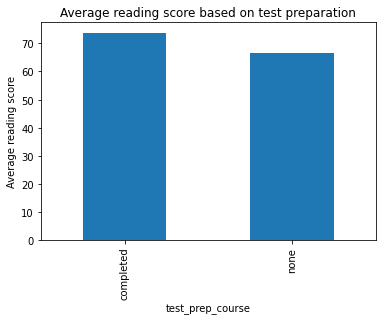

In [7]:
ave_reading.plot(kind="bar" ,ylabel="Average reading score", title="Average reading score based on test preparation")

From the above graph, it can be seen that the average reading score that students do test preparations is slightly higher than students who do not prepare for tests. The difference in average readings between these two categories is around 7.36. It looks like doing test preparation is important to get a better score on reading tests. 

What would be other factors that have a great impact on test scores? Let's explore the relationship between parental education levels and test preparation on test scores.

### What are the average scores for the different parental education levels?

In [8]:
# finding ave score based on parental education levels
parent_education_lvl = df.groupby(["parent_education_level","test_prep_course"]).agg({"math":"mean", "reading":"mean", "writing":"mean"})

In [9]:
#check on the new dataframe
parent_education_lvl

math    reading    writing
parent_education_level test_prep_course                                 
associate's degree     completed         71.829268  76.170732  76.817073
                       none              65.571429  67.857143  65.842857
bachelor's degree      completed         73.282609  76.739130  78.695652
                       none              66.902778  70.611111  69.986111
high school            completed         65.000000  67.839286  68.053571
                       none              60.992857  63.450000  60.207143
master's degree        completed         70.600000  78.250000  80.100000
                       none              69.307692  73.897436  73.410256
some college           completed         71.454545  75.987013  76.519481
                       none              64.892617  66.087248  64.872483
some high school       completed         66.701299  70.948052  70.363636
                       none              61.078431  63.911765  60.754902

In [10]:
#create a dataframe to calculate difference in math,reading and writing in each category

#get the educational name
col_name = df.parent_education_level.unique()

#loop through each educational name, and find the difference between test_prep_course with list comphrehensive
avg_diff = [parent_education_lvl.loc[i].diff().dropna() for i in col_name]

#concat a list of dataframe into on dataframe,reset index and rename the column
avg_diff= pd.concat(avg_diff).reset_index().rename(columns={"test_prep_course":"parent_education_level"})

#set the renamed column into col_name
avg_diff["parent_education_level"] = col_name

avg_diff

,parent_education_level,math,reading,writing
0,bachelor's degree,-6.379831,-6.128019,-8.709541
1,some college,-6.561928,-9.899765,-11.646997
2,master's degree,-1.292308,-4.352564,-6.689744
3,associate's degree,-6.257840,-8.313589,-10.974216
4,high school,-4.007143,-4.389286,-7.846429
5,some high school,-5.622867,-7.036287,-9.608734


The above table shows students' average scores with/without test preparation in math, reading, and writing with different parents' educational backgrounds. The reason why the " value is negative is due to none test_prep_course - completed test_prep. Let's do some data visualization.

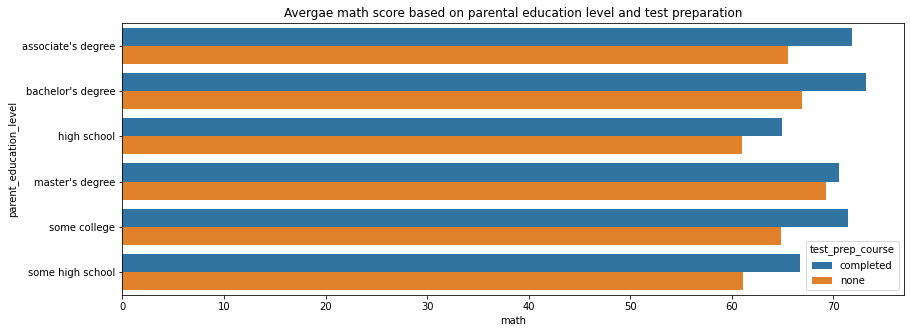

In [11]:
# reset parent_education_lvl index
parent_education_lvl = parent_education_lvl.reset_index()

#bar plot on average math based on parent_education_level and test_prep_course
plt.figure(figsize=(14,5))
ax = sns.barplot(data = parent_education_lvl, x ="math", y = "parent_education_level", hue="test_prep_course")
plt.title("Avergae math score based on parental education level and test preparation")
plt.show()

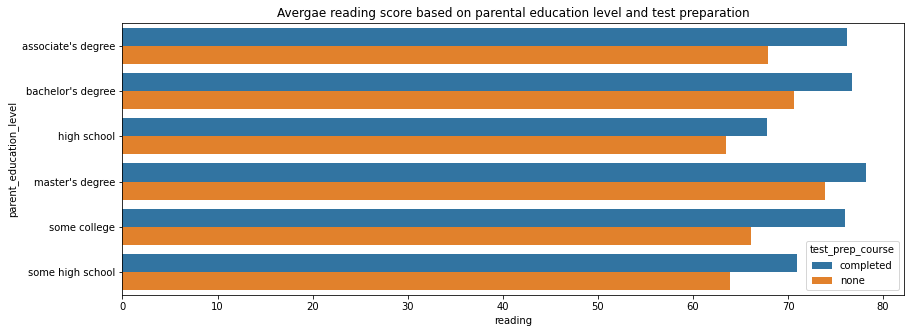

In [12]:
#bar plot on average reading based on parent_education_level and test_prep_course
plt.figure(figsize=(14,5))
ax = sns.barplot(data = parent_education_lvl, x ="reading", y = "parent_education_level", hue="test_prep_course")
plt.title("Avergae reading score based on parental education level and test preparation")
plt.show()

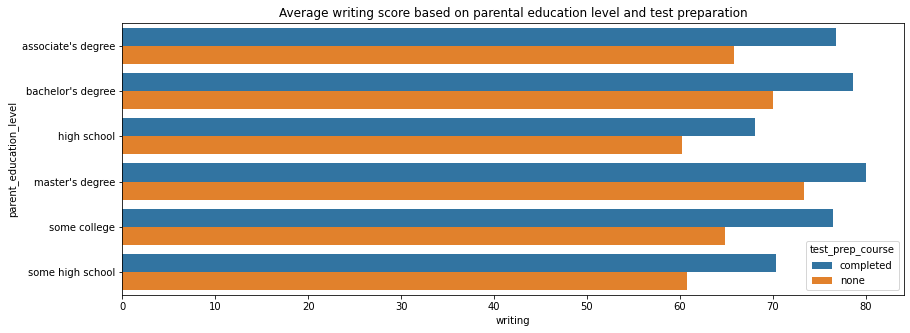

In [13]:
#bar plot on average writing based on parent_education_level and test_prep_course
plt.figure(figsize=(14,5))
ax = sns.barplot(data = parent_education_lvl, x ="writing", y = "parent_education_level", hue="test_prep_course")
plt.title("Average writing score based on parental education level and test preparation")
plt.show()

All three plots have general patterns that students have parents with higher education, students tend to have a higher average score in math, reading, and writing with test preparations than students who do not prepare for tests in these three categories. Similarly, students' parents with higher education, students have better average scores with/without test preparations.

Students' parents have a master's degree, it leads to students have the highest average scores in writing and reading with/without test preparations. Surprisingly, the highest average score in math falls among students' parents who have a bachelor's degree with test preparations. For without test preparations, it is still in parents have a master's degree.

### Since the school principle is interested in correlation between subjects if a kid have good scores. Let's assume that good scores are at least 90 in scale of 100 for all 3 subjects.

In [14]:
# finding students whose math, reading and writing is greater than 90 
top_scores = df[(df.math >= 90) & (df.reading >= 90) & (df.writing >= 90)]

# got the correlation in top scores df
top_scores.corr()

,math,reading,writing
math,1.000000,0.144489,0.290565
reading,0.144489,1.000000,0.760227
writing,0.290565,0.760227,1.000000


In [15]:
top_scores.shape

(28, 8)

The extracted sample size is only 28 out of 1000, which is less than 3% of the given datasets. For students who are good at math, it does not have a strong implication that has good performance in reading and writing based on top_scores correlation table. However, if students have good scores in reading, they tend to have better scores in writing as well.  

### To sum up all of the above, the conclusion drives on the followings:
1. Preparation for tests has a significant impact on scores based on average reading scores.

2. Parents' educational backgrounds somehow have some impact on students' average scores in math, reading, and writing. Students' parents have a better education level, and students tend to have better performance in math, reading, and writing with/without test preparation in average.

3. Math does not have a significant connection between reading and writing for students who have all 3 scores of at least 90. However, better readings will come out with better writing since the correlation between these two categories is 0.76.